In [2]:
import pandas as pd

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
sns.set(style="whitegrid")

In [5]:
data_path = '../data/'

In [7]:
#now we need to load all the available dataset
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
stores = pd.read_csv(data_path + 'stores.csv')
holidays = pd.read_csv(data_path + 'holidays_events.csv')
oil = pd.read_csv(data_path + 'oil.csv')
transactions = pd.read_csv(data_path + 'transactions.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')



In [8]:
#now we need to confirm the loaded data
print(f"Train shape: {train.shape}")


Train shape: (3000888, 6)


In [9]:
print(f"Test shape: {test.shape}")


Test shape: (28512, 5)


In [11]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])


In [15]:
train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [16]:
print(train.isnull().sum())


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


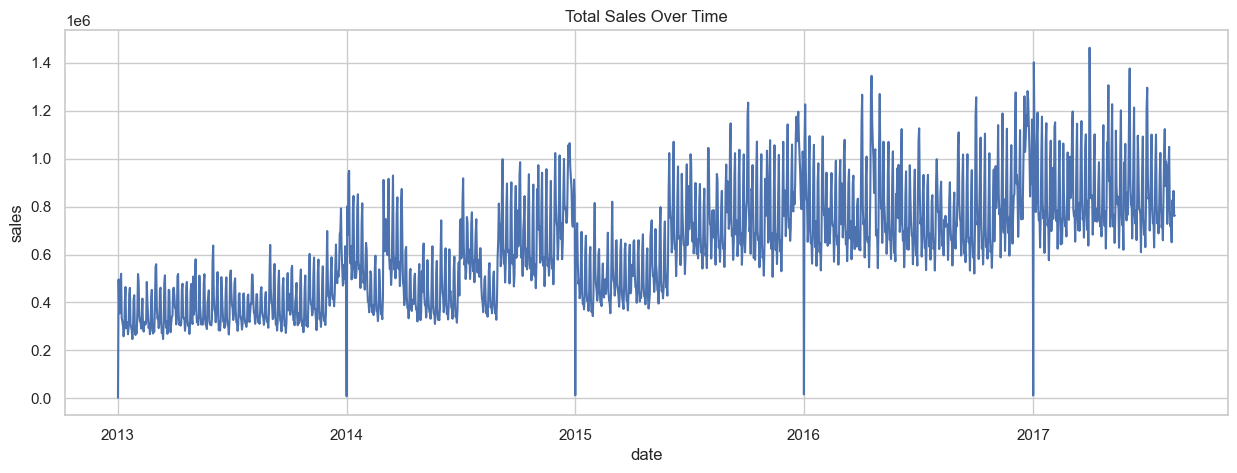

In [17]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=train.groupby('date')['sales'].sum())
plt.title("Total Sales Over Time")
plt.show()

In [18]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [22]:
train = train.merge(stores, on = 'store_nbr',how = 'left')

In [23]:
train = train.merge(oil, on='date', how='left')

# Merge holiday info
train = train.merge(holidays, on='date', how='left')

# Merge transactions
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')


In [24]:
train.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [25]:
train.tail()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0


In [26]:
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')


/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2543711156.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')


In [27]:
train['dcoilwtico'] = train['dcoilwtico'].ffill()

In [28]:
train['transactions'] = train['transactions'].fillna(0)
train['type_y'] = train['type_y'].fillna('No Holiday')

In [29]:
train.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0.0


In [30]:
train['dcoilwtico'] = train['dcoilwtico'].ffill().bfill()


In [31]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0


In [32]:
train['date'] = pd.to_datetime(train['date'])

In [33]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['weekofyear'] = train['date'].dt.isocalendar().week
train['is_weekend'] = train['dayofweek'].isin([5, 6]).astype(int)


In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
cat_cols = ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description']

le = LabelEncoder()


In [36]:
for col in cat_cols:
    train[col] = le.fit_transform(train[col].astype(str))


In [37]:
features = ['store_nbr', 'family', 'onpromotion', 'city', 'state', 'type_x', 'cluster',
            'dcoilwtico', 'type_y', 'locale', 'locale_name', 'description', 'transferred',
            'transactions', 'year', 'month', 'day', 'dayofweek', 'weekofyear', 'is_weekend']


In [38]:
X = train[features]
y = train['sales']

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

ValueError: Input contains NaN

In [44]:
# Check any missing values in your feature set
print(X.isnull().sum())


store_nbr             0
family                0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico            0
type_y                0
locale                0
locale_name           0
description           0
transferred     2551824
transactions          0
year                  0
month                 0
day                   0
dayofweek             0
weekofyear            0
is_weekend            0
dtype: int64


In [45]:
X['transferred'] = X['transferred'].fillna(False)


/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2523886390.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['transferred'] = X['transferred'].fillna(False)
/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2523886390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['transferred'] = X['transferred'].fillna(False)


In [46]:
# Fill NA and convert safely using .loc
X.loc[:, 'transferred'] = X['transferred'].fillna(False).astype(int)


/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2784427094.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, 'transferred'] = X['transferred'].fillna(False).astype(int)


In [47]:
X['transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2890087718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


In [48]:
X.loc[:, 'transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


In [49]:
print(X.isnull().sum())


store_nbr       0
family          0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
year            0
month           0
day             0
dayofweek       0
weekofyear      0
is_weekend      0
dtype: int64


In [50]:
model.fit(X_train, y_train)


ValueError: Input contains NaN

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

ValueError: Input contains NaN

In [53]:
print(X_train.isnull().sum())


store_nbr             0
family                0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico            0
type_y                0
locale                0
locale_name           0
description           0
transferred     2041152
transactions          0
year                  0
month                 0
day                   0
dayofweek             0
weekofyear            0
is_weekend            0
dtype: int64


In [54]:
X['transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


/var/folders/8j/q_nmghrn67z96c02_dr9nj7w0000gn/T/ipykernel_57163/2890087718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


In [55]:
X.loc[:, 'transferred'] = X['transferred'].fillna(False).astype(bool).astype(int)


In [56]:
print(X.isnull().sum())


store_nbr       0
family          0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
dcoilwtico      0
type_y          0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
year            0
month           0
day             0
dayofweek       0
weekofyear      0
is_weekend      0
dtype: int64


In [57]:
X_encoded = pd.get_dummies(X, columns=[
    'family', 'city', 'state', 'type_x', 'type_y',
    'locale', 'locale_name', 'description'
])


In [58]:
from sklearn.model_selection import train_test_split

y = train['sales']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 303.35974614577935
Mean Squared Error: 488341.37095931877
R^2 Score: 0.5917836802556768


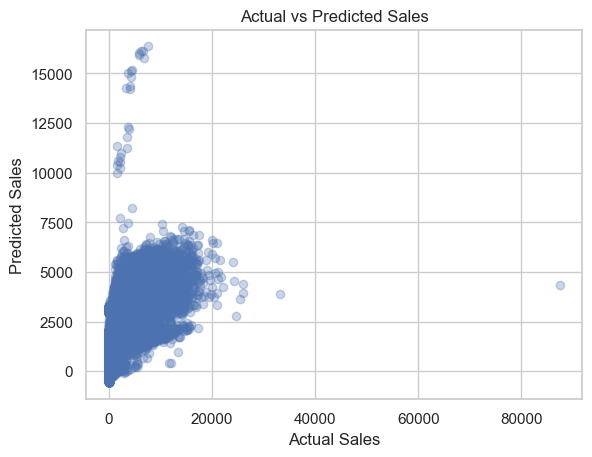

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [ ]:
import os
os.getcwd()
